# Chapter 10: DL - Recurrent Neural Networks

# A. Sentiment analysis 


Here we fit a simple LSTM RNN for sentiment analysis with the *IMDb* movie-review data (part of the *keras* library).

In [39]:
library(keras)

In [2]:
max_features <- 10000

imdb <- dataset_imdb(num_words = max_features)

In [3]:
#unpacking list of lists
c(c(x_train, y_train), c(x_test, y_test)) %<-% imdb

In [4]:
word_index <- dataset_imdb_word_index()

In [5]:
#create a function, decode review(), 
#that provides a simple interface to the dictionary.
decode_review <- function(text, word_index) {
                word <- names(word_index)
                idx <- unlist(word_index, use.names = FALSE)
                word <- c("<PAD>", "<START>", "<UNK>", "<UNUSED>", word)
                idx <- c(0:3, idx + 3)
                words <- word[match(text, idx, 2)]
                paste(words, collapse = " ")}

In [6]:
x_train[[1]][1:25]

[1]    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941    4
[16]  173   36  256    5   25  100   43  838  112   50

In [7]:
decode_review(x_train[[1]][1:25], word_index)

[1] "<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there"

In [8]:
wc <- sapply(x_train, length)
median(wc)

[1] 178

In [9]:
wc

[1]  218  189  141  550  147   43  123  562  233  130  450   99  117  238
   [15]  109  129  163  752  212  177  129  140  256  888   93  142  220  193
   [29]  171  221  174  647  233  162  597  234   51  336  139  231  704  142
   [43]  861  132  122  570   55  214  103  186  113  169  469  138  302  766
   [57]  351  146   59  206  107  152  186  431  147  684  383  324  252  263
   [71]  787  211  314  118  390  132  710  306  167  115   95  158  156   82
   [85]  502  314  190  174   60  145  214  659  408  515  461  202  238  170
   [99]  107  171  158  145  790  258  287   67  123  975  775  236  195  274
  [113]  214   91 1038  815  183  206   50  118  147  141   60   56  439  439
  [127]  213  144  533  303  203  563  129  153   55   92  174  187  183  165
  [141]   78  198  156  223  127   61  362   84   57  176  159   57  159  165
  [155]  213  194  149  130  203   19   98  466  525  130  322  153  408  215
  [169]  472  143  136  354  260  319  125  209  282  810  142  240  148  198
  [183]  193  123  128  103  479  345  263  165  205  333  184   92  177  335
  [197]  120  121  259  180  160  114   59  343  513  133  206  152  206  572
  [211]  153  139  151  129  129  196  433  199  140  311  151  200  584  127
  [225]  513  781  932  526  161  646  135   52  267  174  185  219   81  219
  [239]  131  153  270  644  155  546  284   85  293  155  358   45  231  124
  [253]  178  118  260  393  127  157  107  322  188  126  155  294  249  177
  [267]  138  215  263  132  150  217  188  385  199  127  325  161  140  215
  [281]  240  230  327  129  113  225   87  496  234  311  215  111  102  110
  [295]  165  839  296  130  104  274  229  235  653  468  578  139  315   65
  [309]  178  836  164  239  212  297  258  157   78  544  152  120  208  163
  [323]  226  304  195  454  121  175  617  320  121  245  655  114  131  104
  [337]  238  138  164   52  215   87  471  142  289  106  141  239  412  154
  [351]  175  828   41  144  525  176  551  251  621  159   75  207   80   94
  [365]   78  449  622  157   85  260 1011  444  326  586  118  270  360   95
  [379]  640  315  138  573  434  313  128 1007  130  257  209  159  602  109
  [393]  250  117  149  199   55  578  158  323  486  177   73  127  138  130
  [407]  110  283  244  375  137  156  153  112   94  137  195  137  112   25
  [421]  106  105  272  857  116   58  114   71   57  292   56  157  283   87
  [435]  327  481  918  129  181  214  601  215  117  112  401  165  154  587
  [449]  417  345  233  496  403  317  189  340  195  370  194  150  559   48
  [463]  129  110   45  173  674  416  233  146   73  146  190  130  127  217
  [477]  785  227  119  149  150  175  588  130  414  172  523  119  130  122
  [491]  219  264  202  218  367  230  429  985  144  128   60   78  125  131
  [505]  186  283  121  226   82   57  468  336  218  110  535  603  147  117
  [519]  156   72   72   69  529  148   56  263  202  348  172  104  212  146
  [533]  191  251  179  722  156  141  235   97   69  222  228  233   46  130
  [547]  599  146   71  144  132   89  115  267  100  148  197  627  161  263
  [561]  447   97  132  357   52  329  149  253  330  549  166  190  165  202
  [575]  351  633  942  123  121  184  270  139  248  382  292  215  439  177
  [589]   42  173  173  233  480  377   48  177  192   84  176  150  467  210
  [603]  687  631  279  136   67  167  170  359  451  135  197 1009   87  241
  [617]  492  336   88  170  425  459  331  199  158   69  121  116  120  297
  [631]  173  293  103  477  723  133  413  109  101  227  141  939  199  162
  [645]  377  172  532   68   41  130   83  136  787  117  165  111  124  552
  [659]  172  130   96  153  181   49  119   88  100  297  363  632  218  168
  [673]  100  212  120   84  135  268  127  746  127  236  335  193  843  251
  [687]  165  210  239  311  214   29  334  168  127  169  110  164  147  205
  [701]  133  188  125  183  326  150  290  214  328   51  343  212  454   96
  [715]  471   82  523  11

In [10]:
#over 91% of the documents have fewer than 500 words.
sum(wc <= 500) / length(wc)

[1] 0.91568

In [11]:
#RNN requires all the document sequences to have the same length.  
#use the last L = 500 words, 
#and pad the beginning of the shorter ones with blanks
maxlen <- 500
x_train <- pad_sequences(x_train, maxlen = maxlen)
x_test <- pad_sequences(x_test, maxlen = maxlen)

In [12]:
dim(x_train)

[1] 25000   500

In [13]:
 x_train[1, 490:500]

[1]   16 4472  113  103   32   15   16 5345   19  178   32

In [14]:
#RNN model
model <- keras_model_sequential() %>%
    layer_embedding(input_dim = 10000, output_dim = 32) %>%
    layer_lstm(units = 32) %>%
    layer_dense(units = 1, activation = "sigmoid")

In [15]:
model

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 embedding (Embedding)              (None, None, 32)                320000      
 lstm (LSTM)                        (None, 32)                      8320        
 dense (Dense)                      (None, 1)                       33          
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________

The first layer of the RNN is an embedding layer of size 32, which will be learned during training. This layer one-hot encodes each document as a matrix of dimension 500 × 10, 000, and then maps these 10, 000 dimensions down to 32.

The second layer is an LSTM with 32 units, and the output layer is a single sigmoid for the binary classification task

In [16]:
model %>% compile(optimizer = "rmsprop",
loss = "binary_crossentropy", metrics = c("acc"))

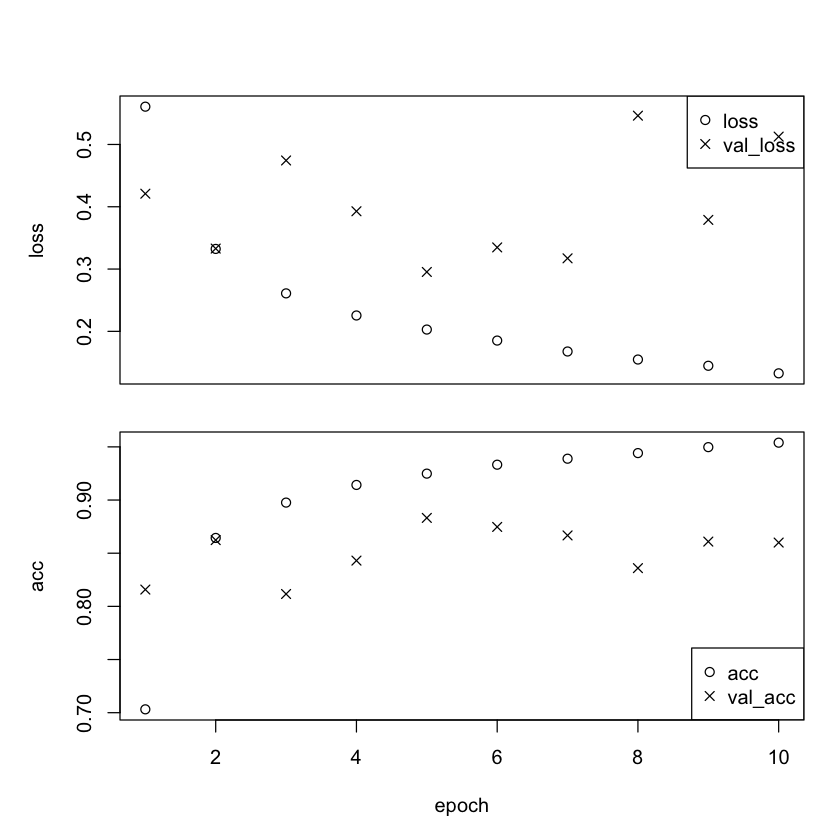

In [17]:
history <- model %>% fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = list(x_test, y_test))
plot(history)


In [22]:
predy <- predict(model, x_test) >0.5

In [23]:
mean(abs(y_test == as.numeric(predy)))

[1] 0.86

# B. Time Series Prediction

In [1]:
library(keras)

In [2]:
library(ISLR2)
xdata <- data.matrix(
NYSE[, c("DJ_return", "log_volume","log_volatility")])

In [3]:
head(NYSE)

,date,day_of_week,DJ_return,log_volume,log_volatility,train
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
1,1962-12-03,mon,-0.004461,0.032573,-13.12740,TRUE
2,1962-12-04,tues,0.007813,0.346202,-11.74930,TRUE
3,1962-12-05,wed,0.003845,0.525306,-11.66561,TRUE
4,1962-12-06,thur,-0.003462,0.210182,-11.62677,TRUE
5,1962-12-07,fri,0.000568,0.044187,-11.72813,TRUE
6,1962-12-10,mon,-0.010824,0.133246,-10.87253,TRUE


In [4]:
head(xdata)

DJ_return,log_volume,log_volatility
-0.004461,0.032573,-13.12740
0.007813,0.346202,-11.74930
0.003845,0.525306,-11.66561
-0.003462,0.210182,-11.62677
0.000568,0.044187,-11.72813
-0.010824,0.133246,-10.87253


In [5]:
#The variable istrain contains a TRUE for 
#each year that is in the training set, 
#and a FALSE for each year in the test set.
istrain <- NYSE[, "train"]
xdata <- scale(xdata)

## Create an autoregressive dataframe

We first write functions to create lagged versions of the three time series. We start with a function that takes as input a data matrix and a lag L, and returns a lagged version of the matrix. 

In [6]:
lagm <- function(x, k = 1) {
        n <- nrow(x)
        pad <- matrix(NA, k, ncol(x))
        rbind(pad, x[1:(n - k), ]) }

We now use this function to create a data frame with all the required lags, as well as the response variable.

In [7]:
#autoregression dataframe
arframe <- data.frame(log_volume = xdata[, "log_volume"], 
                        L1 = lagm(xdata, 1), L2 = lagm(xdata, 2),
                        L3 = lagm(xdata, 3), L4 = lagm(xdata, 4),
                        L5 = lagm(xdata, 5))


In [8]:
head(arframe)

,log_volume,L1.DJ_return,L1.log_volume,L1.log_volatility,L2.DJ_return,L2.log_volume,L2.log_volatility,L3.DJ_return,L3.log_volume,L3.log_volatility,L4.DJ_return,L4.log_volume,L4.log_volatility,L5.DJ_return,L5.log_volume,L5.log_volatility
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1750605,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1.5171653,-0.54977791,0.1750605,-4.356718,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2.2836006,0.90512515,1.5171653,-2.528849,-0.5497779,0.1750605,-4.356718,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,0.9350983,0.43477682,2.2836006,-2.417837,0.9051251,1.5171653,-2.528849,-0.5497779,0.1750605,-4.356718,NA,NA,NA,NA,NA,NA
5,0.2247600,-0.43136108,0.9350983,-2.366325,0.4347768,2.2836006,-2.417837,0.9051251,1.5171653,-2.528849,-0.5497779,0.1750605,-4.356718,NA,NA,NA
6,0.6058680,0.04633644,0.2247600,-2.500763,-0.4313611,0.9350983,-2.366325,0.4347768,2.2836006,-2.417837,0.9051251,1.5171653,-2.528849,-0.5497779,0.1750605,-4.356718


## Fit an autoregressive model

If we look at the first five rows of this frame, we will see some missing values in the lagged variables (due to the construction above). We remove these rows, and adjust istrain accordingly.

In [9]:
arframe <- arframe[-(1:5), ] 
istrain <- istrain[-(1:5)]

We now fit the linear AR model to the training data using lm(), and predict on the test data.

In [10]:
arfit <- lm(log_volume ~ ., data = arframe[istrain, ])
arpred <- predict(arfit, arframe[!istrain, ])
V0 <- var(arframe[!istrain, "log_volume"])
1 - mean((arpred - arframe[!istrain, "log_volume"])^2) / V0

[1] 0.413223

We refit this model, including the factor variable day of week.

In [12]:
arframed <-
data.frame(day = NYSE[-(1:5), "day_of_week"], arframe)
arfitd <- lm(log_volume ~ ., data = arframed[istrain, ])
arpredd <- predict(arfitd, arframed[!istrain, ])
1 - mean((arpredd - arframe[!istrain, "log_volume"])^2) / V0

[1] 0.4598616

## Fit an RNN 

To fit the RNN, we need to reshape these data, since it expects a sequence of $L = 5$ feature vectors $X = {X_l}^L_1$ for each observation. These are lagged versions of the time series going back $L$ time points.

In [13]:
n <- nrow(arframe)
xrnn <- data.matrix(arframe[, -1]) 
xrnn <- array(xrnn, c(n, 3, 5))
xrnn <- xrnn[,, 5:1]
xrnn <- aperm(xrnn, c(1, 3, 2))
dim(xrnn)

[1] 6046    5    3

In [14]:
model <- keras_model_sequential() %>%
        layer_simple_rnn(units = 12,input_shape = list(5, 3),
                        dropout = 0.1, recurrent_dropout = 0.1) %>%
        layer_dense(units = 1)


In [15]:
model %>% compile(optimizer = optimizer_rmsprop(), loss = "mse")

In [16]:
history <- model %>% fit(xrnn[istrain,, ], arframe[istrain, "log_volume"], 
                        batch_size = 64, epochs = 200,
                        validation_data = list(xrnn[!istrain,, ], arframe[!istrain, "log_volume"])
                        )

In [17]:
history


Final epoch (plot to see history):
    loss: 0.4269
val_loss: 0.626 

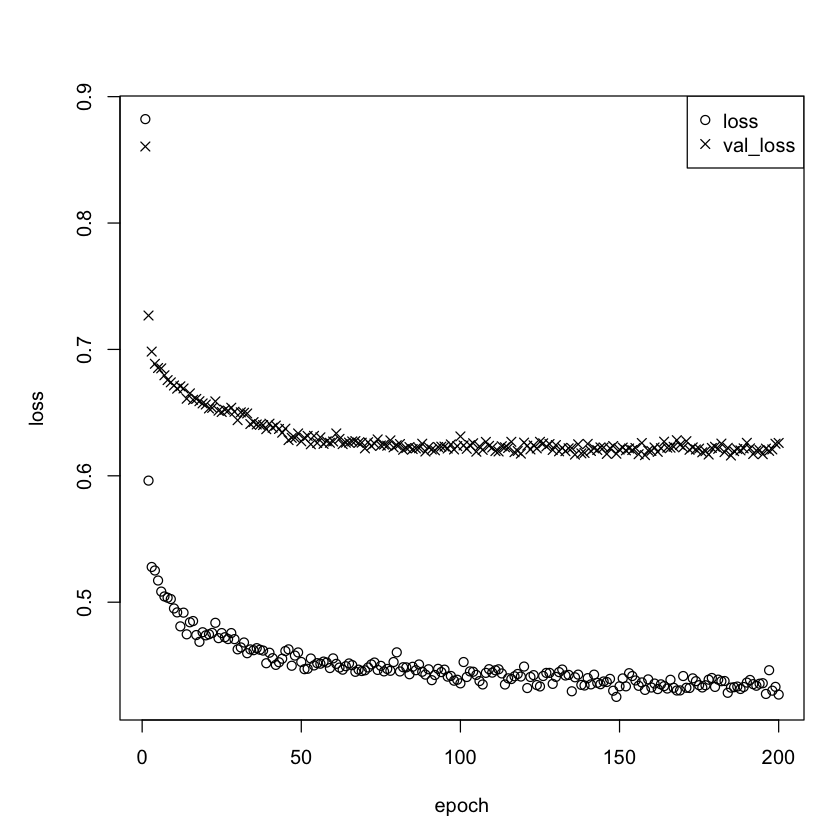

In [18]:
plot(history)

In [19]:
kpred <- predict(model, xrnn[!istrain,, ])
1 - mean((kpred - arframe[!istrain, "log_volume"])^2) / V0

[1] 0.4061207


# References

Chapter 10, **An Introduction to Statistical Learning with Applications in R**, Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani.
